<div dir=rtl style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
    <font size=3>
    باسمه تعالی
    </font>
    <br><br>
    <font>
    درس یادگیری ماشین
    <br>
        <font size=3>
            مدرس: دکتر سید عباس حسینی
        </font>
    </font>
    <br><br>
    <font>
        <b>فاز اول پروژه</b>
    </font>
    <br>
        <font size=2>
        دانشگاه صنعتی شریف
        <br>
        دانشکده مهندسی کامپیوتر
        <br>
        محمدمتین فتوحی 97106143
        <br>
        مهسا شیخی 96105886
    </font>
</div>
</font>
</div>

# <p style="font-size:40px; text-align: right;" ><b>Loading Data</b></p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, Binarizer, Normalizer, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn import svm
from scipy import sparse
import scipy
from keras.models import Sequential
from keras.layers import Dense
!pip install eli5
import eli5
! pip install fasttext
import nltk
from gensim.models import Word2Vec, FastText

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
file_name = '/content/drive/MyDrive/ML_Phase2_Datasets/sarcasm_train_set.csv'
train_data = pd.read_csv(file_name, index_col=0)
file_name = '/content/drive/MyDrive/ML_Phase2_Datasets/sarcasm_test_set.csv'
test_data = pd.read_csv(file_name, index_col=0)
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808998 entries, 0 to 808997
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      808998 non-null  int64 
 1   label           808998 non-null  int64 
 2   comment         808960 non-null  object
 3   author          808998 non-null  object
 4   subreddit       808998 non-null  object
 5   score           808998 non-null  int64 
 6   ups             808998 non-null  int64 
 7   downs           808998 non-null  int64 
 8   date            808998 non-null  object
 9   created_utc     808998 non-null  object
 10  parent_comment  808998 non-null  object
dtypes: int64(5), object(6)
memory usage: 67.9+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201828 entries, 0 to 201827
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      201828 non-null  int64 
 1   label           201828 non-null  int64 
 2   comment         201813 non-null  object
 3   author          201828 non-null  object
 4   subreddit       201828 non-null  object
 5   score           201828 non-null  int64 
 6   ups             201828 non-null  int64 
 7   downs           201828 non-null  int64 
 8   date            201828 non-null  object
 9   created_utc     201828 non-null  object
 10  parent_comment  201828 non-null  object
dtypes: int64(5), object(6)
memory usage: 16.9+ MB


# <p style="font-size:40px; text-align: right;" ><b>EDA</b></p>


<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
در ابتدا مقادیر یکتای هرکدام از ستون ها و سپس تعداد سلول های خالی داده مورد نظر را ببرسی میکنیم. همانطور که مشاهده میشود داده در تعدا بسیار کمی از سلول ها خالی است که آن هم فقط مربوط به یک ستون است
 </p>

In [ ]:
for col in train_data.columns:
    print(col, len(train_data[col].unique()))

Unnamed: 0 808998
label 2
comment 772481
author 249291
subreddit 13617
score 1183
ups 1068
downs 2
date 96
created_utc 805032
parent_comment 790289


In [ ]:
train_data.isna().sum()

Unnamed: 0         0
label              0
comment           38
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
test_data.isna().sum()

Unnamed: 0         0
label              0
comment           15
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
در ابتدا باید بررسی کنیم ببینیم ایا کلاس های مسئله ballanced هستند یا نه. همانطور که مشاهده میشود به تعداد یکسانی از هر کدام از کلاس ها در داده موجود میباشد
 </p>

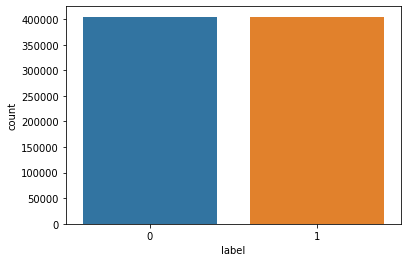

In [ ]:
sns.countplot(x=train_data['label']);

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم تاثیر ستون downs را مشاهده کنیم. نمودار زیر تعداد نمونه های هرکلاس را با توجه به مقدار downs نشان میدهد. همانطور که مشاهده میشود در نسبت کلاس ها با توجه به هرکدام از مقادیر downs باهم برابر است و مقدار این ستون اطلاعات خاصی را به ما نمیدهد
 </p>

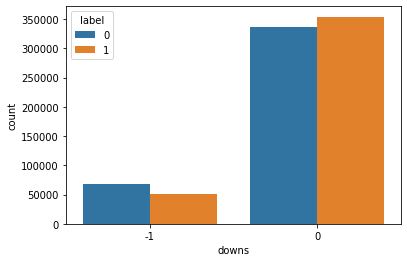

In [ ]:
sns.countplot(data=train_data, x='downs', hue='label');

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
نمودار زیر نیز یک نمودار جعبه ای روی مقادیر ستون score است. همانطور که مشاهده میشود مقادیر این ستون تمرکز و چگالی زیادی نزدیک مقدار 0 دارد
 </p>

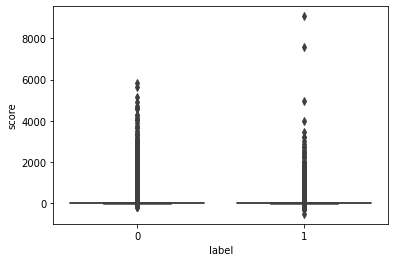

In [ ]:
sns.boxplot(data = train_data, x="label", y="score");

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در نمودار زیر طول کامنت ها را بررسی کرده ایم. البته از لگاریتم طول کامنت ها استفاده شده است. همانطور که مشاهده میشود تمرکز طول کانت ها نیز حول مقدار 3 تا 4 است
 </p>

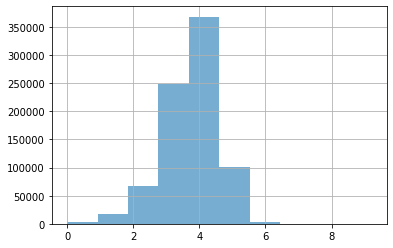

In [ ]:
train_data["comment"].apply(lambda x: np.log(len(str(x)))).hist(alpha = 0.6, bins = 10);

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم ببینم چه کلمه هایی هستند که در کامنت های دارای کنایه زیاد تکرار شده اند. شکل زیر این کلمه ها را به ما نشان میدهد
 </p>

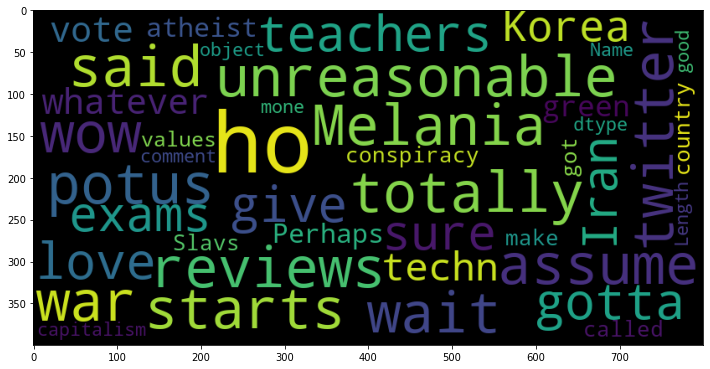

In [ ]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(train_data.loc[train_data['label'] == 1, 'comment']))
plt.grid(b= False)
plt.imshow(wordcloud);

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم نسبت طول کامنت به کامنت والدش را بررسی کنیم. همانطور که در شکل زیر نشان داده شده است به نظر میرسد طول کامنت با طول کامنت والد خود نسبت معکوس دارد و هرچقدر طول کامنت والد زیاد شده طول کامنت فرزند کاهش میابد و برعکس 
 </p>

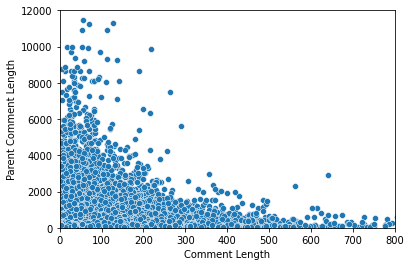

In [ ]:
length_df = pd.DataFrame({"Comment Length": train_data["comment"].apply(lambda x: len(str(x))),
                          "Parent Comment Length": train_data["parent_comment"].apply(lambda x: len(str(x)))})
ax = plt.axes()
sns.scatterplot(data=length_df, x="Comment Length", y="Parent Comment Length")
# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم تاثیر موضوعات مختلف کامنت را برروی داشتن کنایه در آن بررسی کنیم. در ابتدا یک دیتافریم میسازیم که هر موضوع و تعداد کامنت هایی کل و کامنت هایی که دارای کنایه هستند و مربوط به آن موضوع اند را دارد
 </p>

In [ ]:
subreddit_df = pd.DataFrame({"sarcastic": train_data.loc[train_data["label"]==1, "subreddit"].value_counts(),
                             "total": train_data["subreddit"].value_counts()})
subreddit_df.fillna(0, inplace = True)
subreddit_df["sarcasm_ratio"] = subreddit_df["sarcastic"] / subreddit_df["total"]
mean_subreddit_count = np.mean(subreddit_df["total"])

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
همانطور که مشاهده میشود میانگین کامنت های مرتبط با یک موضوع حدودا 60 است
 </p>

In [ ]:
mean_subreddit_count

59.410883454505395

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال برترین موضوعات براساس نسبت کامنت های کنایه دار را بدست میاوریم. همچنین این شرط را قرار میدهیم که تعداد کامنت های مرتبط با این موضوع باید بیشتر از میانگین باشد
 </p>

In [ ]:
subreddit_df.sort_values(by="sarcasm_ratio", ascending=False).query("total > {}".format(mean_subreddit_count)).head(30)

,sarcastic,total,sarcasm_ratio
creepyPMs,3449.0,4381,0.787263
AnythingGoesNews,63.0,85,0.741176
PussyPass,51.0,69,0.739130
circlebroke,103.0,141,0.730496
libertarianmeme,54.0,74,0.729730
ontario,54.0,74,0.729730
AndroidMasterRace,89.0,122,0.729508
ShitPoliticsSays,160.0,222,0.720721
progun,307.0,432,0.710648
wisconsin,121.0,171,0.707602


<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
قسمت زیر نیز موضوعاتی که کمترین کنایه در آنها یافت میشود را نشان میدهد. همچنین تعداد کامنت های مرتبط با آنها نیز باید بیشتر از حد متوسط باشد
 </p>

In [ ]:
subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {}".format(mean_subreddit_count)).head(30)

,sarcastic,total,sarcasm_ratio
onewordeach,0.0,94,0.000000
AskOuija,0.0,123,0.000000
CatsStandingUp,0.0,79,0.000000
friendsafari,1.0,110,0.009091
Fireteams,16.0,417,0.038369
pokemontrades,10.0,165,0.060606
IASIP,9.0,92,0.097826
RoastMe,54.0,513,0.105263
circlejerk,41.0,339,0.120944
me_irl,72.0,569,0.126538


<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
برای بررسی موثر بودن مقدار score در کنایه دار بودن یک کامنت به این شکل عمل میکنیم که مقادیر score را به چند بازی تقسیم کرده و هر کدام را به یک بازه اختصاص میدهیم. به دلیل متمرکز بودن بخش زیادی از این داده نمیتوان آنها را به تعداد زیادی گروه تقسیم کرد. همانطور که در شکل زیر نمایش داده شده است گروه های مختلف score فرق چندان زیادی در نسبت کامنت های کنایه دار ندارند
 </p>

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


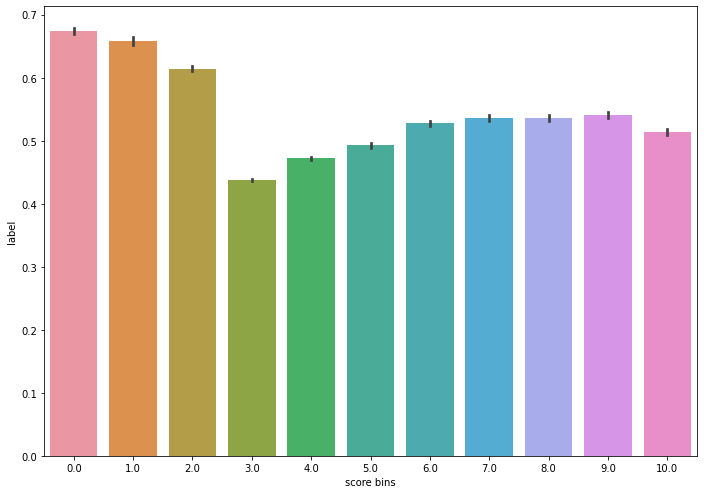

In [ ]:
# kmeans or uniform strategy leads to some groups having a few members

est = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')
score_df = pd.DataFrame({"label": train_data.label,
                         "score bins": est.fit_transform(np.array(train_data["score"]).reshape(len(train_data["score"]), 1))[:,0]})
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(data = score_df, x = "score bins", y = "label");

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در قسمت زیر نیز همانکاری که برای score کرده بودیم را برای ستون ups انجام داده ایم که در این قسمت نیز تفاوت چندانی بین گروه های مختلف به نظر نمیرسد
 </p>

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


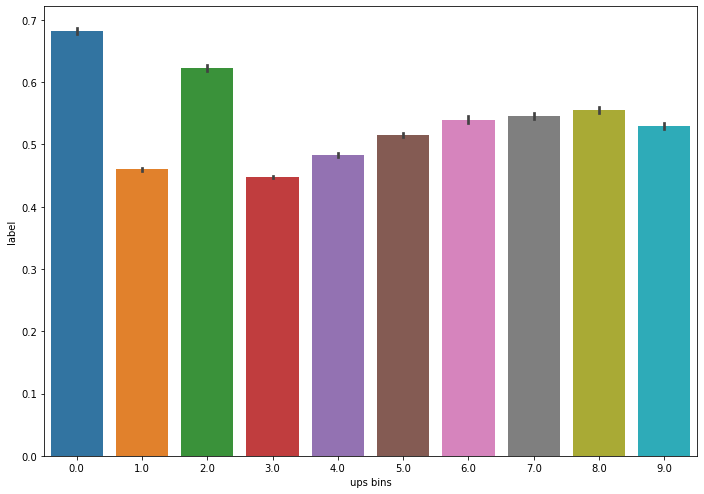

In [ ]:
est = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')
ups_df = pd.DataFrame({"label": train_data.label,
                         "ups bins": est.fit_transform(np.array(train_data["ups"]).reshape(len(train_data["ups"]), 1))[:,0]})
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(data = ups_df, x = "ups bins", y = "label");

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم تاثیر تاریخ را روی کنایه دار بودن کامنت بررسی کنیم. به عبارتی میخواهیم بررسی کنیم که ایا روزهای هفته یا ماه یا حتی سال های مختلف روی کنایه دار بودن کامنت ها تاثیر دارد یا خیر. <br>
در ابتدا یک دیتافریم شامل لیبل هر کامنت و روز هفته و ماه و سال آن درست میکنیم
 </p>

In [ ]:
date_df = pd.DataFrame({"label": train_data["label"]})
date_df["day name"] = pd.to_datetime(train_data['created_utc'], format = '%Y-%m-%d %H:%M:%S').apply(lambda x: x.day_name())
date_df["month name"] = pd.to_datetime(train_data['created_utc'], format = '%Y-%m-%d %H:%M:%S').apply(lambda x: x.month_name())
date_df["year"] = pd.to_datetime(train_data['created_utc'], format = '%Y-%m-%d %H:%M:%S').apply(lambda x: x.year)

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
شکل زیر تاثیر روزهای هفته را روی کنایه دار بودن کامنت نشان میدهد. همانطور که مشاهده میشود تفاوتی بین روزهای هفته وجود ندارد
 </p>

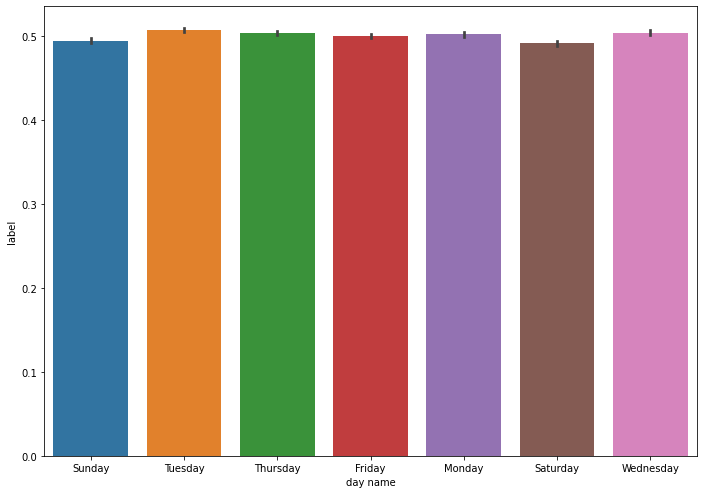

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(data = date_df, x = "day name", y = "label");

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
شکل زیر نیز نسبت کامنت های کنایه دار را در ماه های مختلف نشان میدهد. با وجود اینکه در ماه های انتهایی سال کنایه بیشتری به چشم میخورد اما بازهم تفاوت خیلی کمی بین ماه ها وجود دارد
 </p>

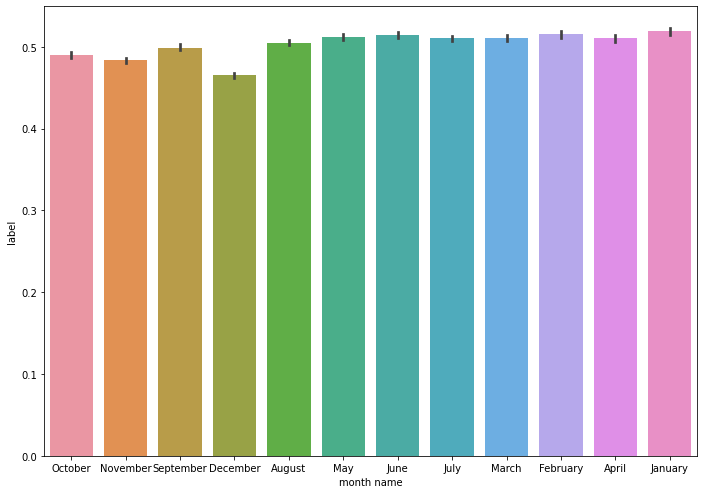

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(ax = ax, data = date_df, x = "month name", y = "label");

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در شکل زیر نسبت کامنت های کنایه دار در سال های مختلف نمایش داده شده است. همانطور که مشاهده میشود به نظر میرسد به گذشت زمان مردم کمتر کامنت کنایه دار میگذارند اما بازهم تفاوتی چندانی بین سال های مختلف به چشم نمیخورد
 </p>

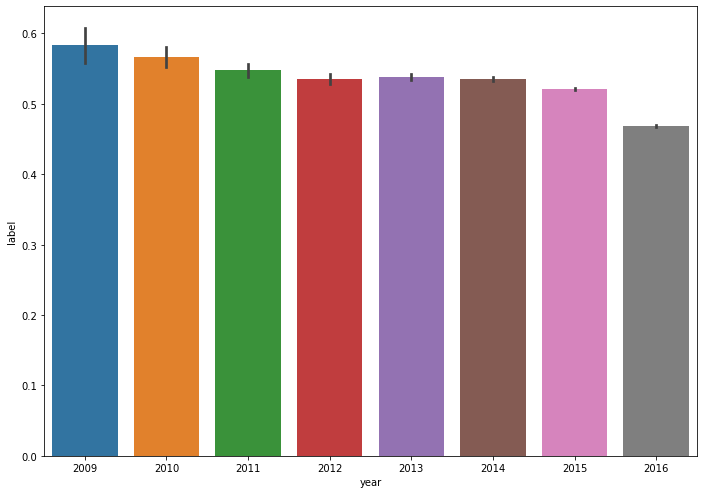

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(ax = ax, data = date_df, x = "year", y = "label");

# <p style="font-size:40px; text-align: right;" ><b>Feature Engineering</b></p>

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در ابتدا ستون هایی که نیاز نداریم را پاک میکنیم. از بین ستون های داده فقط ستون لیبل و ستون موضوع را نیاز داشتیم و باقی ستون های تاثیر خاصی در کنایه امیز بودن کامنت نداشتند
 </p>

In [ ]:
train_data.drop(columns=["date", "created_utc", "author", "score",	"ups",	"downs"], inplace = True)
test_data.drop(columns=["date", "created_utc", "author", "score",	"ups",	"downs"], inplace = True)

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال ردیف هایی که سلول خالی دارند را حدف میکنیم. تعداد این ردیف های بسیار کم و در حد 40 یا 50 تا است.
 </p>






In [ ]:
# only comment columns have na
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
train_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال برای گروه بندی موضوعات روش زیر را بکار میبریم. یک گروه را موضوعاتی که بیشتر از 70 درصد کامنت های آنها کنایه امیز است قرار میدهیم. گروه بعدی بین 65 تا 70. گروه های دیگر را نیز به ترتیب بین 0 تا 10, بین 10 تا 20 و بین 20 تا 30 درصد قرار میدهیم. باقی موضوعات باقی مانده نیز یک گروه جدا میشوند.
 </p>

In [ ]:
subred_above_70 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio > {}".format(mean_subreddit_count, 0.70)).index)
subred_between_65_70 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio > {} and sarcasm_ratio <= {}".format(
                                                                                                                                        mean_subreddit_count, 0.65, 0.70)).index)
subred_below_10 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio < {}".format(mean_subreddit_count, 0.10)).index)
subred_between_10_20 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio > {} and sarcasm_ratio <= {}".format(
                                                                                                                                        mean_subreddit_count, 0.10, 0.20)).index)
subred_between_20_30 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio > {} and sarcasm_ratio <= {}".format(
                                                                                                                                        mean_subreddit_count, 0.20, 0.30)).index)
subred_groups = [subred_below_10, subred_between_10_20, subred_between_20_30, subred_between_65_70, subred_above_70]

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال ستون موضوعات داده را بصورت عددی درمیاوریم
 </p>

In [ ]:
def set_subred_group(subred):
  for j in range(len(subred_groups)):
    if subred in subred_groups[j]:
      return j + 1
  return 0
train_data["subreddit"] = train_data["subreddit"].apply(set_subred_group)
test_data["subreddit"] = test_data["subreddit"].apply(set_subred_group)

In [ ]:
# STOPWORDS

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
لازم است لیبل ها را بصورت ارایه جدا داشته باشیم. برای مدل های مختلف نیاز به لیبل های مختلف داریم. برای همین یک نمونه از لیبل ها بصورت ارایه تک بعدی و یک نمونه دیگر بصورت one hot درست میکنیم که در train شبکه عصبی ما کاربرد دارد
 </p>

In [ ]:
y_train = np.array(train_data["label"])
y_test = np.array(test_data["label"])
ohe = OneHotEncoder()
y_train_one_hot = ohe.fit_transform(y_train.reshape((-1, 1))).toarray()
y_test_one_hot = ohe.fit_transform(y_test.reshape((-1, 1))).toarray()

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
همچنین برای vectorize کردن کامنت ها نیاز داریم آنها را بصورت لیست داشته باشیم که در قسمت زیر این کار را برای داده های ترین و تست انجام داده ایم
 </p>

In [ ]:
train_x = list(train_data["comment"])
test_x = list(test_data["comment"])

# comments_parents_together_train_x = [train_data.loc[i, "parent_comment"] + train_data.loc[i, "comment"] for i in range(len(train_data))]
# comments_parents_together_test_x = [test_data.loc[i, "parent_comment"] + test_data.loc[i, "comment"] for i in range(len(test_data))]

<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
برای آموزش مدل های word2vec و FastText نیاز داریم که یک سری پیش پردازش روی کامنت ها انجام بدیم. در درجه اول نیاز داریم که کامنت ها tokenize بشوند. به این معنی که کلمات مجزای هر کامنت مشخص بشوند. از پیش پردازش های دیگری که در این قسمت انجام داده ایم این است stemming و lemmatizing است. این پیش پردازش ها برای این انجام شده است که فرم های مختلف یک کلمه به یک شکل در بیایند. بطور مثال دو کلمه run و running ر دو به run تبدیل شوند. این پیش پردازش دقت مدل ها را بالاتر میبرد. تابعی که در قسمت زیر زده شده یک رشته را میگیرد و پس از انجام مراحل فوق لیستی از توکن های پیش پردازش شده را بر میگرداند
 </p>

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
porterStemmer = nltk.PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer() 
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''  
def prepare_text(raw_text):
    tokens = nltk.word_tokenize(raw_text)
  
    # remove punctuation, casefolding, stem and then lemmatize
    for i in range(len(tokens)-1,-1, -1):
        if tokens[i] in punc:
            del tokens[i]
        else:
            stemmed_casefolded_token = porterStemmer.stem(tokens[i].casefold())
            tokens[i] = lemmatizer.lemmatize(stemmed_casefolded_token)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<br><p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال برای هر کامنت در قسمت ترین و تست پیش پردازش بالا را انجام میدهیم
 </p>

In [ ]:
%%time
tokenized_train_x = [prepare_text(x) for x in train_x]
tokenized_test_x = [prepare_text(x) for x in test_x]
# almost 1GB ram

CPU times: user 7min 1s, sys: 2.56 s, total: 7min 3s
Wall time: 7min 4s


# <p style="font-size:40px; text-align: right;" ><b>TF-IDF embeding</b></p>

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
این ایمبدینگ به این صورت است که ابتدا TF و IDF را برای هر Term مشخص میکند و سپس این مقدار را در هم ضرب میکند. مقدار TF یا همان term frequency تعداد تکرار کلمه را نشان میدهد. مقدار IDF یا همان inverse document frequency نیز لگاریم تعداد کل داکیومنت ها تقسیم بر داکیومنت های حاوی آن ترم است 
 </p>

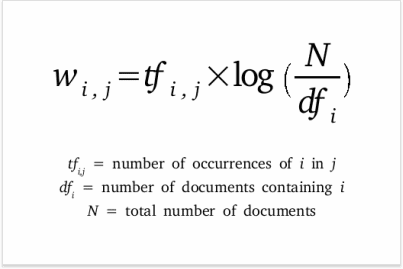




<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در 2 قسمت زیر وکتورهای مرتبط با tf-idf کامنت ها را بدست اورده ایم
 </p>

In [ ]:
Tf_Idf_Vectorizer = TfidfVectorizer(ngram_range = (1,1), stop_words='english', max_features=500).fit(train_x)
# Tf_Idf_Vectorizer = TfidfVectorizer(ngram_range = (1,1), stop_words=None).fit(train_x)

In [ ]:
Tf_Idf_train_x = sparse.hstack([Tf_Idf_Vectorizer.transform(train_x), sparse.csr_matrix(np.array(train_data["subreddit"]).reshape((-1, 1)))])
Tf_Idf_test_x = sparse.hstack([Tf_Idf_Vectorizer.transform(test_x), sparse.csr_matrix(np.array(test_data["subreddit"]).reshape((-1, 1)))]) 

# <p style="font-size:40px; text-align: right;" ><b>Worc2Vec embedding</b></p>


<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در این مدل سعی میشود برای کلمات موجود در corpus بردارهایی پیدا شود که کلماتی که از نظر معنایی به هم نزدیک تر هستند بردارهای نزدیک تری نسبت به هم نیز داشته باشند. <br>
اینکار را به 2 روش skip-gram و CBOW(common bag of words) میتوان انجام داد. <br>
در روش CBOW با گرفتن پنجره ای کلمات اطراف یک کلمه میخواهیم کلمه مورد نظر را پیش بینی کنیم. همانطور که در شکل زیر نیز نمایش داده شده است بدین منظور از یک شبکه عصبی با یک لایه پنهان استفاده میشود. اگر پنجره ما شامل n کلمه باشد, این n کلمه بصورت one hot اینکود شده و به شبکه داده میشوند.
 </p>

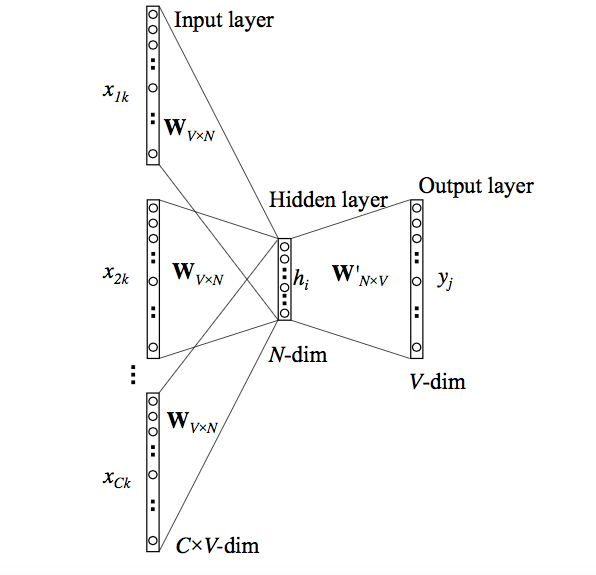

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در روش skip-gram برخلاف روش CBOW میخواهیم با داشتن یک کلمه, همسایگی آن را مشخص کنیم. در این روش نیز همانطور که در شکل زیر مشخص شده از یک شبکه عصبی تک لایه استفاده شده است که یک ورودی به صورت one hot دارد و اگر همسایگی مورد نظر ما شامل n کلمه باشد خروجی نیز شامل n قسمت است که تعداد نورون های هرقسمت برابر طول برداری است که برای هر کلمه میخواهیم بدست بیاوریم
 </p>

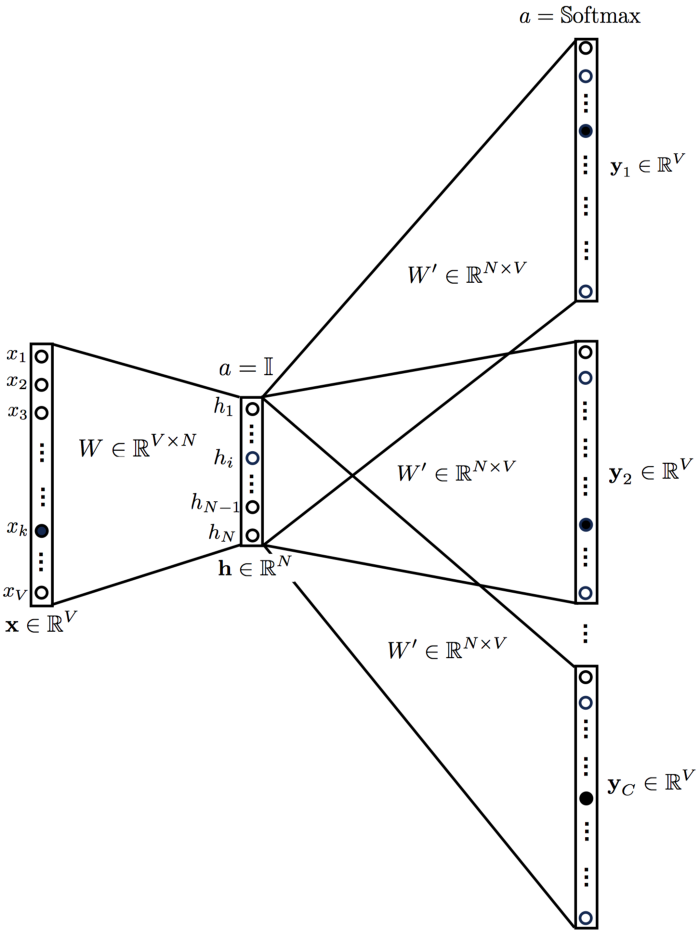

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میدانیم که این مدل فقط برای کلمات یک بردار بدست میاورد و برای جملات چیزی به ما نمیدهد. یک روش برای تبدیل جملات به بردار این است که میانگین بردارهای کلمات موجود در جمله را بگیریم که در این قسمت نیز از این روش استفاده شده است <br>
در قسمت های زیر ابتدا مدل تعریف شده, سپس یک تابع برای بدست اوردن بردار یک جمله نوشته شده است و در قسمت های بردارهای داده های ترین و تست محاسبه شده است
 </p>

In [ ]:
%%time
word2vec_model = Word2Vec(tokenized_train_x, min_count=1, size=200, window=5)
# almost 300MG ram

CPU times: user 3min 13s, sys: 1.2 s, total: 3min 14s
Wall time: 1min 59s


In [ ]:
def cal_word2vec(tokens_list, word2vec_model):
  result = np.zeros(word2vec_model.vector_size)
  tokens_number = 0
  for token in tokens_list:
    # print(token)
    try:
      result += word2vec_model[token]
      tokens_number += 1
    except:
      continue
  return result

In [ ]:
%%time
word2vec_test_x = sparse.csr_matrix(np.vstack([cal_word2vec(comment_tokens, word2vec_model) for comment_tokens in tokenized_test_x]))
word2vec_train_x = sparse.csr_matrix(np.vstack([cal_word2vec(comment_tokens, word2vec_model) for comment_tokens in tokenized_train_x]))
# almost 200MG ram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


CPU times: user 1min 28s, sys: 12.6 s, total: 1min 40s
Wall time: 1min 39s


# <p style="font-size:40px; text-align: right;" ><b>FastText embedding</b></p>


<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
این embedding بهبود یافته مدل قبل است که در آن سعی شده با استفاده از n-gram ها کارایی مدل را افزایش دهند <br>
در قسمت زیر این مدل را بر روی کامنت ها ترین کرده و سپس کامنت های ترین و تست را به بردار تبدیل میکنیم
 </p>

In [ ]:
%%time
FastText_model = FastText(size=200, window=5, min_count=1, word_ngrams=1, workers=3)  # instantiate
FastText_model.build_vocab(sentences=tokenized_train_x)

CPU times: user 54.1 s, sys: 2.45 s, total: 56.6 s
Wall time: 56.4 s


In [ ]:
%%time
FastText_model.train(sentences=tokenized_train_x, total_examples=len(tokenized_train_x), epochs=10)  # train

CPU times: user 15min 43s, sys: 2.41 s, total: 15min 45s
Wall time: 8min 10s


In [ ]:
def cal_FastText(tokens_list, FastText_model):
  result = np.zeros(FastText_model.vector_size)
  tokens_number = 0
  for token in tokens_list:
    # print(token)
    try:
      result += FastText_model[token]
      tokens_number += 1
    except:
      continue
  return result

In [ ]:
%%time
FastText_test_x = sparse.csr_matrix(np.vstack([cal_FastText(comment_tokens, FastText_model) for comment_tokens in tokenized_test_x]))
FastText_train_x = sparse.csr_matrix(np.vstack([cal_FastText(comment_tokens, FastText_model) for comment_tokens in tokenized_train_x]))
# almost 200MG ram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


CPU times: user 1min 41s, sys: 9.65 s, total: 1min 51s
Wall time: 1min 50s


# <p style="font-size:40px; text-align: right;" ><b>Testing Models</b></p>


<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
تابع زیر با گرفتن پیش بینی های مدل و لیبل های اصلی متریک های مربوط به مدل و همچنین confusion matrix را برای آن رسم میکند
 </p>

In [ ]:
def classification_rep(y_pred, y_act):
    confusion_matrix = pd.crosstab(np.array(y_pred), np.array(y_act), rownames=['Actual'], colnames=['Predicted'])
    print(classification_report(y_act, y_pred, target_names=["class 0", "class 1"]))
    sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >همچنین برای ارزیابی دقت مدل ها از روش F1-Score استفاده شده است.

# <p style="font-size:40px; text-align: right;" ><b>Testing TF-IDF</b></p>


<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
ابتدا از یک مدل ساده (Logistic Regression) برای ارزیابی TF-IDF Embedding استفاده شد. این مدل برای بررسی ارتباط متغیر مستقل با یک متغیر وابسته باینری 
استفاده می شود.
 </p>

<br><p style="font-size:20px; text-align: right;" ><b>Loggistic regression</b></p>

In [ ]:
%%time
LR_clf_Tf_idf = LogisticRegression(random_state=0, penalty="l2", max_iter = 1000, n_jobs=-1)
LR_clf_Tf_idf.fit(Tf_Idf_train_x, y_train)

CPU times: user 242 ms, sys: 223 ms, total: 465 ms
Wall time: 15.6 s


In [ ]:
Tf_Idf_LR_clf_train_pred = LR_clf_Tf_idf.predict(Tf_Idf_train_x)
Tf_Idf_LR_clf_test_pred = LR_clf_Tf_idf.predict(Tf_Idf_test_x)
# with above cell almost 100MG

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.61      0.73      0.66    404225
     class 1       0.66      0.53      0.59    404735

    accuracy                           0.63    808960
   macro avg       0.64      0.63      0.63    808960
weighted avg       0.64      0.63      0.63    808960



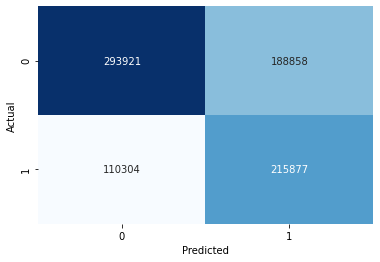

In [ ]:
print("logistic regression report on train data")
classification_rep(Tf_Idf_LR_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.61      0.73      0.66    101180
     class 1       0.66      0.53      0.59    100633

    accuracy                           0.63    201813
   macro avg       0.63      0.63      0.63    201813
weighted avg       0.63      0.63      0.63    201813



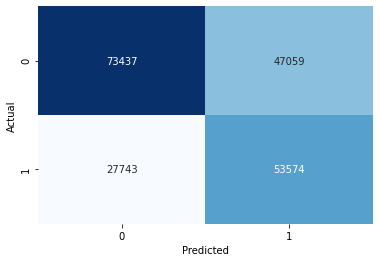

In [ ]:
print("logistic regression report on test data")
classification_rep(Tf_Idf_LR_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
تفسیر نتایج حاصل از این مدل: دقت بدست از آمده از این مدل در حالت train و test تقریبا یکسان بود که این نشان از مناسب بودن مدل از نظر overfit یا underfit نشدن است اما به دلیل کافی نبودن پیچیدگی مدل دقت خوبی بدست نیامد.
 </p>

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
تعدادی از وزن های بدست آمده از TF-IDF Embedding در زیر آمده است:
 </p>

In [ ]:
eli5.show_weights(LR_clf_Tf_idf, vec=Tf_Idf_Vectorizer, top=100, feature_filter=lambda x: x != '<BIAS>')

Weight?,Feature
+3.592,obviously
+3.314,forgot
+3.223,totally
+3.179,clearly
+3.177,duh
+3.169,dropped
+3.064,dare
+2.588,yeah
+2.575,racist
+2.433,fault


<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
مدل دوم برای ارزیابی این امبدینگ مدل Guassian Naive Bayes است. این مدل برای  فیچر های پیوسته با توزیع گاوسی نرمال مناسب است.
 </p>

<p style="font-size:20px; text-align: right;" ><b>Guassian Naive Bayes</b></p>


In [ ]:
%%time
GaussianNB_clf_Tf_Idf = GaussianNB()
GaussianNB_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train)

CPU times: user 6.89 s, sys: 5.04 s, total: 11.9 s
Wall time: 11.9 s


In [ ]:
Tf_Idf_GaussianNB_clf_train_pred = GaussianNB_clf_Tf_Idf.predict(Tf_Idf_train_x.toarray())
Tf_Idf_GaussianNB_clf_test_pred = GaussianNB_clf_Tf_Idf.predict(Tf_Idf_test_x.toarray())
# with above cell almost 100MG

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.59      0.74      0.66    404225
     class 1       0.65      0.49      0.56    404735

    accuracy                           0.61    808960
   macro avg       0.62      0.61      0.61    808960
weighted avg       0.62      0.61      0.61    808960



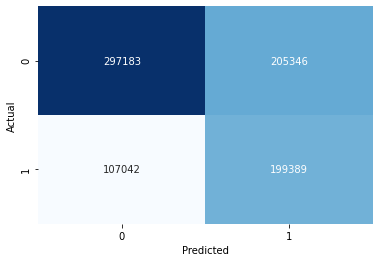

In [ ]:
print("logistic regression report on train data")
classification_rep(Tf_Idf_GaussianNB_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.59      0.73      0.66    101180
     class 1       0.65      0.49      0.56    100633

    accuracy                           0.61    201813
   macro avg       0.62      0.61      0.61    201813
weighted avg       0.62      0.61      0.61    201813



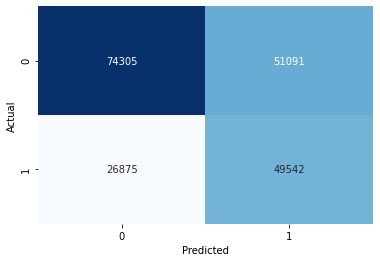

In [ ]:
print("logistic regression report on test data")
classification_rep(Tf_Idf_GaussianNB_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
تفسیر نتایج: دقت مدل برای حالت یادگیری و تست شبیه است که نشان میدهد مدل underfit یا overfit نشده اما به دقت مناسبی نرسیده و نتوانسته داده هارا به خوبی مدل کند.
 </p>

<p style="font-size:20px; text-align: right;" ><b>SVM</b></p>

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
مدل سوم استفاده شده برای ارزیابی مدل SVM است که پیچیدگی بیشتری به نسبت مدل های قبلی دارد. SVM یک الگوریتم یادگیری ماشین supervised است که می تواند برای مسائل طبقه بندی یا رگرسیون استفاده شود.
 </p>

In [ ]:
%%time
SVM_clf_Tf_Idf = svm.LinearSVC(random_state=0, tol=1e-5)
# rows = np.random.choice(list(range(len(train_data))), size=100000, replace=False)
SVM_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train)

CPU times: user 2min 56s, sys: 0 ns, total: 2min 56s
Wall time: 2min 56s


In [ ]:
Tf_Idf_SVM_clf_train_pred = SVM_clf_Tf_Idf.predict(Tf_Idf_train_x.toarray())
Tf_Idf_SVM_clf_test_pred = SVM_clf_Tf_Idf.predict(Tf_Idf_test_x.toarray())

SVM report on train data
              precision    recall  f1-score   support

     class 0       0.61      0.73      0.66    404225
     class 1       0.66      0.53      0.59    404735

    accuracy                           0.63    808960
   macro avg       0.63      0.63      0.63    808960
weighted avg       0.64      0.63      0.63    808960



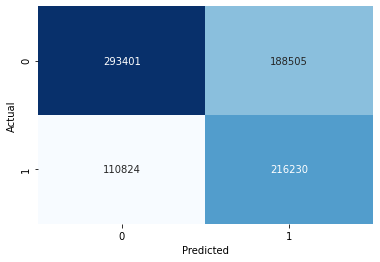

In [ ]:
print("SVM report on train data")
classification_rep(Tf_Idf_SVM_clf_train_pred, y_train)

SVM report on test data
              precision    recall  f1-score   support

     class 0       0.61      0.72      0.66    101180
     class 1       0.66      0.53      0.59    100633

    accuracy                           0.63    201813
   macro avg       0.63      0.63      0.63    201813
weighted avg       0.63      0.63      0.63    201813



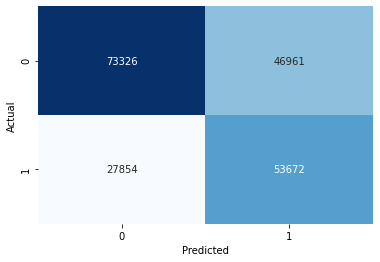

In [ ]:
print("SVM report on test data")
classification_rep(Tf_Idf_SVM_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
تفسیر نتایج: دقت مدل برای حالت یادگیری و تست شبیه است که نشان میدهد مدل underfit یا overfit نشده اما هنوز به دقت مورد نظر نرسیده است.
 </p>

<p style="font-size:20px; text-align: right;" ><b>Nueral Network</b></p>


<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
در آخر از مدل شبکه های عصبی استفاده میکنیم تا بتوانیم پیچیدگی لازم را بدست بیاوریم. شبکه عصبی مجموعه ای از الگوریتم هاست که تلاش می کند روابط را در مجموعه ای از داده ها از طریق فرایندی که از عملکرد مغز انسان تقلید می کند،  تشخیص دهد.<br> در این مدل از لایه های fully connected و از Relu به عنوان activation function و از Binary Cross Entropy به عنوان تابع loss استفاده شد.
 </p>

In [ ]:
%%time
NN_clf_Tf_Idf = Sequential()
NN_clf_Tf_Idf.add(Dense(50, input_dim=Tf_Idf_train_x.shape[1], activation='relu'))
NN_clf_Tf_Idf.add(Dense(12, activation='relu'))
NN_clf_Tf_Idf.add(Dense(2, activation='softmax'))

CPU times: user 55.5 ms, sys: 18.1 ms, total: 73.6 ms
Wall time: 374 ms


In [ ]:
NN_clf_Tf_Idf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
میزان دقت و loss مدل در هر epoch در زیر آمده است. مشاهده میشود که دقت به مرور بالا رفته و loss کم میشود.
 </p>

In [ ]:
%%time
# using validation data with it uses lots of ram leading to crashing
# NN_clf_Tf_Idf_history = NN_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train_one_hot, validation_data = (Tf_Idf_train_x.toarray(),y_test_one_hot), epochs=5, batch_size=64)
NN_clf_Tf_Idf_history = NN_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train_one_hot, epochs=30, batch_size=64)

Epoch 1/30
12640/12640 [==============================] - 36s 2ms/step - loss: 0.6418 - accuracy: 0.6237
Epoch 2/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6263 - accuracy: 0.6391
Epoch 3/30
12640/12640 [==============================] - 21s 2ms/step - loss: 0.6222 - accuracy: 0.6426
Epoch 4/30
12640/12640 [==============================] - 21s 2ms/step - loss: 0.6184 - accuracy: 0.6462
Epoch 5/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6152 - accuracy: 0.6489
Epoch 6/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6127 - accuracy: 0.6510
Epoch 7/30
12640/12640 [==============================] - 21s 2ms/step - loss: 0.6110 - accuracy: 0.6519
Epoch 8/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6090 - accuracy: 0.6534
Epoch 9/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6072 - accuracy: 0.6553
Epoch 10/30
12640/12640 [==============================

In [ ]:
Tf_Idf_NN_clf_train_pred = NN_clf_Tf_Idf.predict(Tf_Idf_train_x.toarray())
Tf_Idf_NN_clf_train_pred = np.array([np.argmax(Tf_Idf_NN_clf_train_pred[i]) for i in range(len(Tf_Idf_NN_clf_train_pred))])

Tf_Idf_NN_clf_test_pred = NN_clf_Tf_Idf.predict(Tf_Idf_test_x.toarray())
Tf_Idf_NN_clf_test_pred = np.array([np.argmax(Tf_Idf_NN_clf_test_pred[i]) for i in range(len(Tf_Idf_NN_clf_test_pred))])

NN report on train data
              precision    recall  f1-score   support

     class 0       0.63      0.79      0.70    404225
     class 1       0.72      0.54      0.62    404735

    accuracy                           0.67    808960
   macro avg       0.68      0.67      0.66    808960
weighted avg       0.68      0.67      0.66    808960



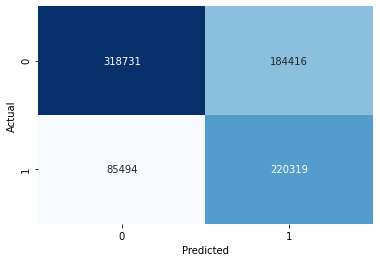

In [ ]:
print("NN report on train data")
classification_rep(Tf_Idf_NN_clf_train_pred, y_train)

NN report on test data
              precision    recall  f1-score   support

     class 0       0.61      0.76      0.68    101180
     class 1       0.68      0.51      0.59    100633

    accuracy                           0.64    201813
   macro avg       0.64      0.64      0.63    201813
weighted avg       0.64      0.64      0.63    201813



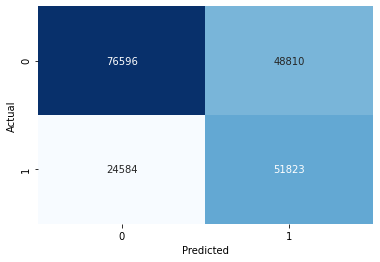

In [ ]:
print("NN report on test data")
classification_rep(Tf_Idf_NN_clf_test_pred, y_test)

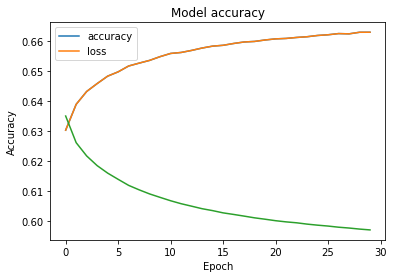

In [ ]:
plt.plot(NN_clf_Tf_Idf_history.history['accuracy'])
plt.plot(NN_clf_Tf_Idf_history.history['accuracy'])
plt.plot(NN_clf_Tf_Idf_history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
در بخش TF-IDF Embedding مشاهده شد که بیشترین دقت با استفاده از یادگیری عمیق با شبکه های عصبی بدست آمد.
 </p>

# <p style="font-size:20px; text-align: right;" ><b>Testing Word2Vec </b></p>


<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
در این بخش از Word2Vec Embedding برای تست مدل ها و ارزیابی دقت استفاده میکنیم.
 </p>


<br><p style="font-size:20px; text-align: right;" ><b>Loggistic regression</b></p>


In [ ]:
%%time
LR_clf_word2vec = LogisticRegression(random_state=0, penalty="l2", max_iter = 1000, n_jobs=-1)
LR_clf_word2vec.fit(word2vec_train_x, y_train)

CPU times: user 2.43 s, sys: 1.46 s, total: 3.88 s
Wall time: 5min 53s


In [ ]:
word2vec_LR_clf_train_pred = LR_clf_word2vec.predict(word2vec_train_x)
word2vec_LR_clf_test_pred = LR_clf_word2vec.predict(word2vec_test_x)

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.64      0.71      0.67    404225
     class 1       0.68      0.61      0.64    404735

    accuracy                           0.66    808960
   macro avg       0.66      0.66      0.66    808960
weighted avg       0.66      0.66      0.66    808960



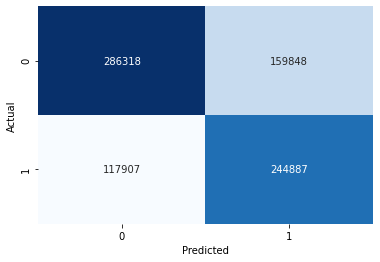

In [ ]:
print("logistic regression report on train data")
classification_rep(word2vec_LR_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.64      0.71      0.67    101180
     class 1       0.67      0.60      0.64    100633

    accuracy                           0.66    201813
   macro avg       0.66      0.66      0.65    201813
weighted avg       0.66      0.66      0.65    201813



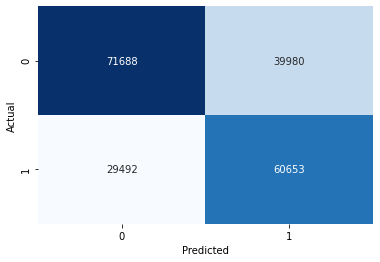

In [ ]:
print("logistic regression report on test data")
classification_rep(word2vec_LR_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج: دقت مدل برای حالت یادگیری و تست شبیه است که نشان میدهد مدل underfit یا overfit نشده است. مشاهده میکنیم که با این روش embedding با مدل مشابه به نسبت حالت قبل نتایج و دقت بهتری حاصل شد.
</p>


<p style="font-size:20px; text-align: right;" ><b>Guassian Naive Bayes</b></p>


In [ ]:
GaussianNB_clf_word2vec = GaussianNB()
GaussianNB_clf_word2vec.fit(word2vec_train_x.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
word2vec_GaussianNB_clf_train_pred = GaussianNB_clf_word2vec.predict(word2vec_train_x.toarray())
word2vec_GaussianNB_clf_test_pred = GaussianNB_clf_word2vec.predict(word2vec_test_x.toarray())

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.57      0.14      0.22    404225
     class 1       0.51      0.89      0.65    404735

    accuracy                           0.52    808960
   macro avg       0.54      0.52      0.44    808960
weighted avg       0.54      0.52      0.44    808960



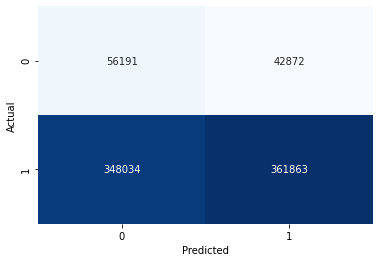

In [ ]:
print("logistic regression report on train data")
classification_rep(word2vec_GaussianNB_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.57      0.14      0.22    101180
     class 1       0.51      0.90      0.65    100633

    accuracy                           0.51    201813
   macro avg       0.54      0.52      0.43    201813
weighted avg       0.54      0.51      0.43    201813



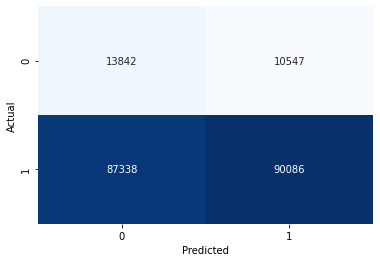

In [ ]:
print("logistic regression report on test data")
classification_rep(word2vec_GaussianNB_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج: این مدل علی رغم پیچیدگی بیشتر نتوانست به دقت خوبی برسد.
</p>



<p style="font-size:20px; text-align: right;" ><b>SVM</b></p>

In [ ]:
%%time
SVM_clf_word2vec = svm.LinearSVC(random_state=0, tol=1e-5)
# rows = np.random.choice(list(range(len(train_data))), size=100000, replace=False)
SVM_clf_word2vec.fit(word2vec_train_x.toarray(), y_train)

CPU times: user 17min 58s, sys: 1.05 s, total: 17min 59s
Wall time: 17min 54s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
word2vec_SVM_clf_train_pred = SVM_clf_word2vec.predict(word2vec_train_x.toarray())
word2vec_SVM_clf_test_pred = SVM_clf_word2vec.predict(word2vec_test_x.toarray())

SVM report on train data
              precision    recall  f1-score   support

     class 0       0.71      0.18      0.28    404225
     class 1       0.53      0.93      0.67    404735

    accuracy                           0.55    808960
   macro avg       0.62      0.55      0.48    808960
weighted avg       0.62      0.55      0.48    808960



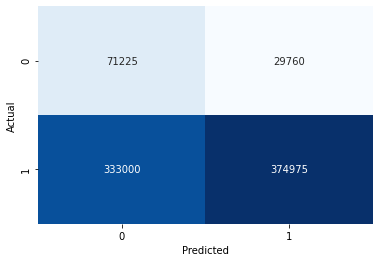

In [ ]:
print("SVM report on train data")
classification_rep(word2vec_SVM_clf_train_pred, y_train)

SVM report on test data
              precision    recall  f1-score   support

     class 0       0.70      0.18      0.28    101180
     class 1       0.53      0.93      0.67    100633

    accuracy                           0.55    201813
   macro avg       0.62      0.55      0.48    201813
weighted avg       0.62      0.55      0.48    201813



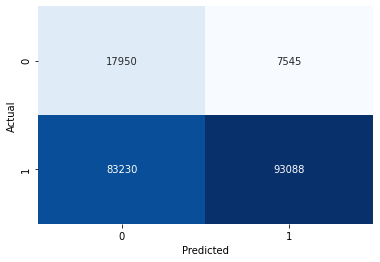

In [ ]:
print("SVM report on test data")
classification_rep(word2vec_SVM_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج: مدل SVM هم برای Word2Vec Embedding به دقت قابل قبولی نرسید و مدل مناسبی برای مدل کردن داده ها نیست.
</p>

<p style="font-size:20px; text-align: right;" ><b>Nueral Network</b></p>


In [ ]:
NN_clf_word2vec = Sequential()
NN_clf_word2vec.add(Dense(50, input_dim=word2vec_train_x.shape[1], activation='relu'))
NN_clf_word2vec.add(Dense(12, activation='relu'))
NN_clf_word2vec.add(Dense(2, activation='softmax'))

In [ ]:
NN_clf_word2vec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%%time
# using validation data with it uses lots of ram leading to crashing
# NN_clf_Tf_Idf_history = NN_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train_one_hot, validation_data = (Tf_Idf_train_x.toarray(),y_test_one_hot), epochs=5, batch_size=64)
NN_clf_word2vec_history = NN_clf_word2vec.fit(word2vec_train_x.toarray(), y_train_one_hot, epochs=30, batch_size=64)

Epoch 1/30
12640/12640 [==============================] - 35s 2ms/step - loss: 0.6293 - accuracy: 0.6457
Epoch 2/30
12640/12640 [==============================] - 19s 2ms/step - loss: 0.5892 - accuracy: 0.6820
Epoch 3/30
12640/12640 [==============================] - 19s 2ms/step - loss: 0.5810 - accuracy: 0.6888
Epoch 4/30
12640/12640 [==============================] - 19s 2ms/step - loss: 0.5756 - accuracy: 0.6935
Epoch 5/30
12640/12640 [==============================] - 19s 1ms/step - loss: 0.5717 - accuracy: 0.6962
Epoch 6/30
12640/12640 [==============================] - 19s 1ms/step - loss: 0.5700 - accuracy: 0.6986
Epoch 7/30
12640/12640 [==============================] - 19s 2ms/step - loss: 0.5681 - accuracy: 0.7002
Epoch 8/30
12640/12640 [==============================] - 19s 1ms/step - loss: 0.5656 - accuracy: 0.7023
Epoch 9/30
12640/12640 [==============================] - 19s 2ms/step - loss: 0.5656 - accuracy: 0.7024
Epoch 10/30
12640/12640 [==============================

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج: طبق انتظار مدل یادگیری عمیق به دلیل پیچیدگی بیشتر به دقت بالا تری رسید و با هر epoch به دقت بالاتر و loss کمتر رسید.
</p>

In [ ]:
word2vec_NN_clf_train_pred = NN_clf_word2vec.predict(word2vec_train_x.toarray())
word2vec_NN_clf_train_pred = np.array([np.argmax(word2vec_NN_clf_train_pred[i]) for i in range(len(word2vec_NN_clf_train_pred))])

word2vec_NN_clf_test_pred = NN_clf_word2vec.predict(word2vec_test_x.toarray())
word2vec_NN_clf_test_pred = np.array([np.argmax(word2vec_NN_clf_test_pred[i]) for i in range(len(word2vec_NN_clf_test_pred))])

NN report on train data
              precision    recall  f1-score   support

     class 0       0.69      0.78      0.73    404225
     class 1       0.75      0.65      0.69    404735

    accuracy                           0.71    808960
   macro avg       0.72      0.71      0.71    808960
weighted avg       0.72      0.71      0.71    808960



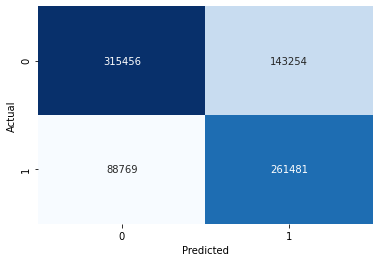

In [ ]:
print("NN report on train data")
classification_rep(word2vec_NN_clf_train_pred, y_train)

NN report on test data
              precision    recall  f1-score   support

     class 0       0.68      0.77      0.72    101180
     class 1       0.73      0.63      0.68    100633

    accuracy                           0.70    201813
   macro avg       0.71      0.70      0.70    201813
weighted avg       0.71      0.70      0.70    201813



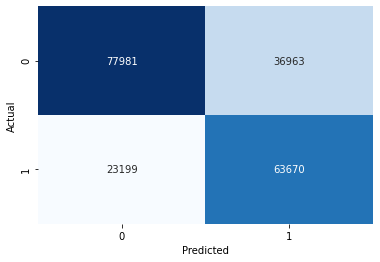

In [ ]:
print("NN report on test data")
classification_rep(word2vec_NN_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج تست: مدل شبکه های عصبی دقت ۷۰ درصد را روی داده های تست به دست آورد که دقت قابل قبولی است و از این مدل برای نتایج نهایی استفاده میکنیم.
</p>

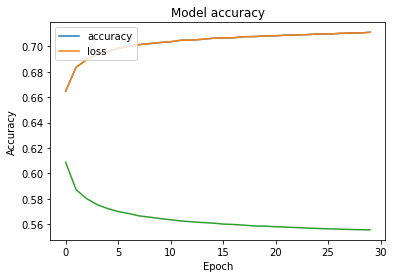

In [ ]:
plt.plot(NN_clf_word2vec_history.history['accuracy'])
plt.plot(NN_clf_word2vec_history.history['accuracy'])
plt.plot(NN_clf_word2vec_history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

# <p style="font-size:40px; text-align: right;" ><b>Testing FastText</b></p>


<br><p style="font-size:20px; text-align: right;" ><b>Loggistic regression</b></p>


In [ ]:
%%time
LR_clf_FastText = LogisticRegression(random_state=0, penalty="l2", max_iter = 1000, n_jobs=-1)
LR_clf_FastText.fit(FastText_train_x, y_train)

CPU times: user 2.59 s, sys: 1.59 s, total: 4.18 s
Wall time: 3min 33s


In [ ]:
FastText_LR_clf_train_pred = LR_clf_FastText.predict(FastText_train_x)
FastText_LR_clf_test_pred = LR_clf_FastText.predict(FastText_test_x)

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.64      0.70      0.67    404225
     class 1       0.67      0.61      0.64    404735

    accuracy                           0.65    808960
   macro avg       0.65      0.65      0.65    808960
weighted avg       0.65      0.65      0.65    808960



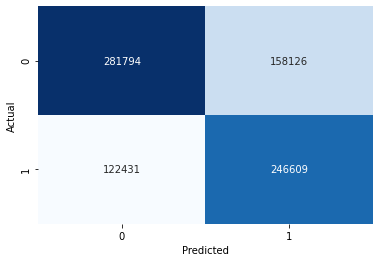

In [ ]:
print("logistic regression report on train data")
classification_rep(FastText_LR_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.64      0.70      0.67    101180
     class 1       0.67      0.61      0.64    100633

    accuracy                           0.65    201813
   macro avg       0.65      0.65      0.65    201813
weighted avg       0.65      0.65      0.65    201813



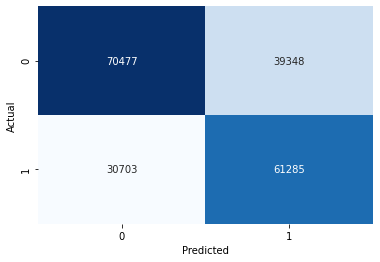

In [ ]:
print("logistic regression report on test data")
classification_rep(FastText_LR_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج: با استفاده از مدل Logistic Regression و با استفاده از FastText Embedding به دقت ۶۵ درصد روی داده های تست رسیدیم که با توجه به سادگی مدل دقت خوبی است.
</p>

<p style="font-size:20px; text-align: right;" ><b>Guassian Naive Bayes</b></p>


In [ ]:
GaussianNB_clf_FastText = GaussianNB()
GaussianNB_clf_FastText.fit(FastText_train_x.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
FastText_GaussianNB_clf_train_pred = GaussianNB_clf_FastText.predict(FastText_train_x.toarray())
FastText_GaussianNB_clf_test_pred = GaussianNB_clf_FastText.predict(FastText_test_x.toarray())

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.58      0.17      0.26    404225
     class 1       0.51      0.88      0.65    404735

    accuracy                           0.52    808960
   macro avg       0.54      0.52      0.45    808960
weighted avg       0.54      0.52      0.45    808960



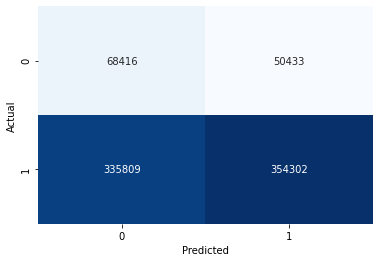

In [ ]:
print("logistic regression report on train data")
classification_rep(FastText_GaussianNB_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.57      0.17      0.26    101180
     class 1       0.51      0.88      0.65    100633

    accuracy                           0.52    201813
   macro avg       0.54      0.52      0.45    201813
weighted avg       0.54      0.52      0.45    201813



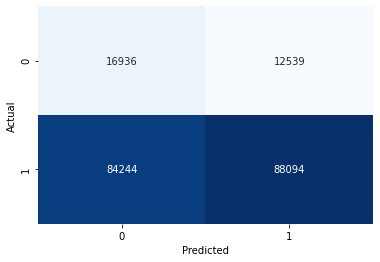

In [ ]:
print("logistic regression report on test data")
classification_rep(FastText_GaussianNB_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج: مدل Guassian Naive Bayes با روش FastText Embedding دقت ۵۲ درصد را روی داده های تست بدست آورد و در نتیجه مدل مناسبی برای این داده ها نیست.
</p>

<p style="font-size:20px; text-align: right;" ><b>SVM</b></p>

In [ ]:
%%time
SVM_clf_FastText = svm.LinearSVC(random_state=0, tol=1e-5)
# rows = np.random.choice(list(range(len(train_data))), size=100000, replace=False)
SVM_clf_FastText.fit(FastText_train_x.toarray(), y_train)

CPU times: user 23min 15s, sys: 1.75 s, total: 23min 16s
Wall time: 23min 11s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
FastText_SVM_clf_train_pred = SVM_clf_FastText.predict(FastText_train_x.toarray())
FastText_SVM_clf_test_pred = SVM_clf_FastText.predict(FastText_test_x.toarray())

SVM report on train data
              precision    recall  f1-score   support

     class 0       0.60      0.58      0.59    404225
     class 1       0.60      0.62      0.61    404735

    accuracy                           0.60    808960
   macro avg       0.60      0.60      0.60    808960
weighted avg       0.60      0.60      0.60    808960



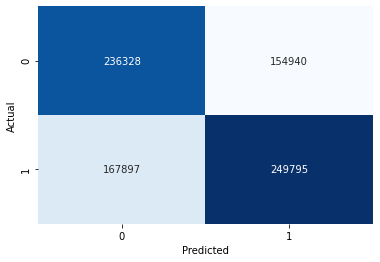

In [ ]:
print("SVM report on train data")
classification_rep(FastText_SVM_clf_train_pred, y_train)

SVM report on test data
              precision    recall  f1-score   support

     class 0       0.61      0.59      0.60    101180
     class 1       0.60      0.62      0.61    100633

    accuracy                           0.60    201813
   macro avg       0.60      0.60      0.60    201813
weighted avg       0.60      0.60      0.60    201813



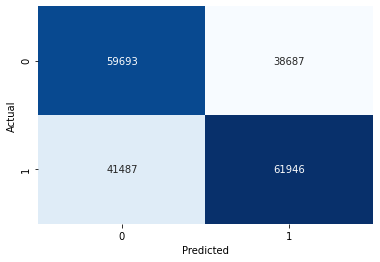

In [ ]:
print("SVM report on test data")
classification_rep(FastText_SVM_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج: مدل SVM که مدل پیچیده تری به نست مدل های قبلی است با FastText Embedding به دقت ۶۰ درصد روی داده های تست رسید که نتیجه نسبتا مناسبی است.
</p>

<p style="font-size:20px; text-align: right;" ><b>Nueral Network</b></p>


In [ ]:
NN_clf_FastText = Sequential()
NN_clf_FastText.add(Dense(50, input_dim=FastText_train_x.shape[1], activation='relu'))
NN_clf_FastText.add(Dense(12, activation='relu'))
NN_clf_FastText.add(Dense(2, activation='softmax'))

In [ ]:
NN_clf_FastText.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%%time
# using validation data with it uses lots of ram leading to crashing
NN_clf_FastText_history = NN_clf_FastText.fit(FastText_train_x.toarray(), y_train_one_hot, epochs=30, batch_size=64)

Epoch 1/30
12640/12640 [==============================] - 33s 1ms/step - loss: 0.6599 - accuracy: 0.6071
Epoch 2/30
12640/12640 [==============================] - 18s 1ms/step - loss: 0.6064 - accuracy: 0.6698
Epoch 3/30
12640/12640 [==============================] - 18s 1ms/step - loss: 0.5941 - accuracy: 0.6794
Epoch 4/30
12640/12640 [==============================] - 18s 1ms/step - loss: 0.5865 - accuracy: 0.6847
Epoch 5/30
12640/12640 [==============================] - 18s 1ms/step - loss: 0.5818 - accuracy: 0.6872
Epoch 6/30
12640/12640 [==============================] - 18s 1ms/step - loss: 0.5790 - accuracy: 0.6904
Epoch 7/30
12640/12640 [==============================] - 18s 1ms/step - loss: 0.5758 - accuracy: 0.6929
Epoch 8/30
12640/12640 [==============================] - 18s 1ms/step - loss: 0.5743 - accuracy: 0.6940
Epoch 9/30
12640/12640 [==============================] - 18s 1ms/step - loss: 0.5732 - accuracy: 0.6950
Epoch 10/30
12640/12640 [==============================

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج: مشاهده میشود که در مدل شبکه های عصبی به مرور loss روی داده های ترین کمتر شده و دقت بیشتر میشود.
</p>

In [ ]:
FastText_NN_clf_train_pred = NN_clf_FastText.predict(FastText_train_x.toarray())
FastText_NN_clf_train_pred = np.array([np.argmax(FastText_NN_clf_train_pred[i]) for i in range(len(FastText_NN_clf_train_pred))])

FastText_NN_clf_test_pred = NN_clf_FastText.predict(FastText_test_x.toarray())
FastText_NN_clf_test_pred = np.array([np.argmax(FastText_NN_clf_test_pred[i]) for i in range(len(FastText_NN_clf_test_pred))])

NN report on train data
              precision    recall  f1-score   support

     class 0       0.68      0.78      0.73    404225
     class 1       0.74      0.63      0.68    404735

    accuracy                           0.71    808960
   macro avg       0.71      0.71      0.70    808960
weighted avg       0.71      0.71      0.70    808960



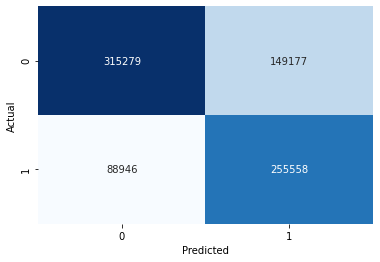

In [ ]:
print("NN report on train data")
classification_rep(FastText_NN_clf_train_pred, y_train)

NN report on test data
              precision    recall  f1-score   support

     class 0       0.67      0.77      0.72    101180
     class 1       0.73      0.62      0.67    100633

    accuracy                           0.70    201813
   macro avg       0.70      0.70      0.70    201813
weighted avg       0.70      0.70      0.70    201813



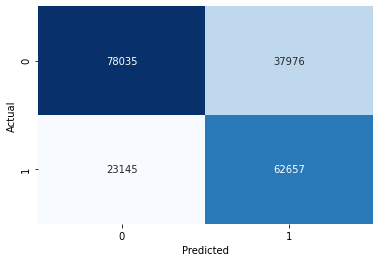

In [ ]:
print("NN report on test data")
classification_rep(FastText_NN_clf_test_pred, y_test)

<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >تفسیر نتایج: با یادگیری عمیق و FastText Embedding دقت ۷۰ درصد روی داده های تست بدست آمد که دقت مناسبی است اما به دلیل سرعت پایین تر مدل به نسبت Word2Vec Embedding در مدل نهایی از آن استفاده نشده است.
</p>

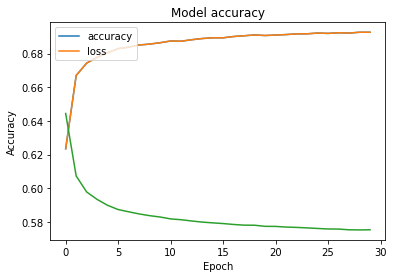

In [ ]:
plt.plot(NN_clf_FastText_history.history['accuracy'])
plt.plot(NN_clf_FastText_history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

# <p style="font-size:40px; text-align: right;" ><b>Final Model</b></p>


<p dir=rtl style="font-size:20px; text-align: right;line-height:30px;" >
برای مدل نهایی, مدل شبکه عصبی ترین شده روی بردارهای word2vec را در در نظر میگیریم. این مدل با وجود اینکه متریک های خیلی مشابهی با مدل شبکه عصبی ترین شده روی بردارهای FastText دارد ولی بدلیل ترین شدن سریع تر مدل word2vec این مدل را انتخاب کردیم
 </p>

NN report on train data
              precision    recall  f1-score   support

     class 0       0.69      0.78      0.73    404225
     class 1       0.75      0.65      0.69    404735

    accuracy                           0.71    808960
   macro avg       0.72      0.71      0.71    808960
weighted avg       0.72      0.71      0.71    808960



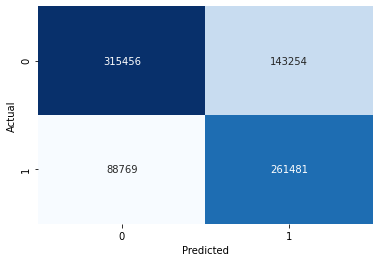

In [ ]:
print("NN report on train data")
classification_rep(word2vec_NN_clf_train_pred, y_train)

NN report on test data
              precision    recall  f1-score   support

     class 0       0.68      0.77      0.72    101180
     class 1       0.73      0.63      0.68    100633

    accuracy                           0.70    201813
   macro avg       0.71      0.70      0.70    201813
weighted avg       0.71      0.70      0.70    201813



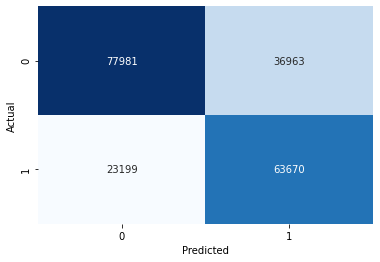

In [ ]:
print("NN report on test data")
classification_rep(word2vec_NN_clf_test_pred, y_test)

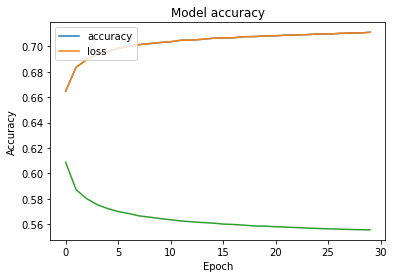

In [ ]:
plt.plot(NN_clf_word2vec_history.history['accuracy'])
plt.plot(NN_clf_word2vec_history.history['accuracy'])
plt.plot(NN_clf_word2vec_history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()